# Second Hand Datasets

## PyTorch

### Library

In [19]:
# Import semua alat yang kita butuhkan
import torch  # Library utama buat deep learning
import torch.nn as nn  # Bikin model jaringan saraf
import torch.optim as optim  # Optimizer buat update bobot model
import torch.nn.functional as F  # Aktivasi & fungsi tambahan

import pandas as pd
import numpy as np  # Bantu operasi matematika
import matplotlib.pyplot as plt  # Buat visualisasi data

from sklearn.model_selection import train_test_split  # Pisah dataset jadi training & testing
from sklearn.preprocessing import StandardScaler  # Normalisasi data
from sklearn.metrics import mean_squared_error, r2_score
from torch.utils.data import DataLoader, TensorDataset  # Manajemen dataset di PyTorch

### Datasets

In [20]:
df = pd.read_csv('secondhanddataset.csv').drop(columns=['v.id'])
# df.info()

X = df.drop(columns=['current price'])
y = df['current price']

### Input & Output

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=32, shuffle=False)

### Model & Training

In [23]:
class MLPRegression(nn.Module):
  def __init__(self, input_dim):
    super(MLPRegression, self).__init__()
    #Define layers
    self.fc1 = nn.Linear(input_dim, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 1)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
        # Define forward pass
        x = self.relu(self.fc1(x))            # Apply ReLU after first layer
        x = self.dropout(x)                   # Optional: apply dropout
        x = self.relu(self.fc2(x))            # Apply ReLU after second layer
        x = self.dropout(x)                   # Optional: apply dropout
        x = self.relu(self.fc3(x))            # Apply ReLU after third layer
        x = self.fc4(x)                       # No activation on output layer for regression
        return x

input_dim = X_train.shape[1]
model_torch = MLPRegression(input_dim)

In [24]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001, weight_decay=1e-5)  # Optimizer Adam

num_epochs = 200
for epoch in range(num_epochs):
  for X_batch, y_batch in train_loader:
    optimizer.zero_grad()   # Reset gradien biar nggak numpuk
    y_pred = model_torch(X_batch) # Model memprediksi output
    loss = criterion(y_pred, y_batch)  # Hitung error
    loss.backward()  # Backpropagation buat update bobot
    optimizer.step()  # Update bobot berdasarkan loss

  if(epoch+1)%10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 98894602240.0000
Epoch [20/200], Loss: 38487932928.0000
Epoch [30/200], Loss: 1432092416.0000
Epoch [40/200], Loss: 1965721856.0000
Epoch [50/200], Loss: 1049263808.0000
Epoch [60/200], Loss: 1370596736.0000
Epoch [70/200], Loss: 1308076928.0000
Epoch [80/200], Loss: 1381553024.0000
Epoch [90/200], Loss: 1068909440.0000
Epoch [100/200], Loss: 1494794112.0000
Epoch [110/200], Loss: 1050279616.0000
Epoch [120/200], Loss: 1143008768.0000
Epoch [130/200], Loss: 1209393408.0000
Epoch [140/200], Loss: 1087852800.0000
Epoch [150/200], Loss: 1286414976.0000
Epoch [160/200], Loss: 1527399168.0000
Epoch [170/200], Loss: 2169592320.0000
Epoch [180/200], Loss: 1440125184.0000
Epoch [190/200], Loss: 536522752.0000
Epoch [200/200], Loss: 828025984.0000


### Eval

In [25]:
model_torch.eval()

with torch.no_grad():
    y_pred = model_torch(X_test_torch)  # Use the tensor version
    test_loss = criterion(y_pred, y_test_torch)  # Use the tensor version

print(f"Test Loss: {test_loss.item():.4f}")

pytorch_preds = model_torch(X_test_torch).detach().numpy()
mse_pytorch = mean_squared_error(y_test, pytorch_preds)
rmse_pytorch = np.sqrt(mse_pytorch)
r2_pytorch = r2_score(y_test, pytorch_preds)

print()
print(f'MSE  : {mse_pytorch:.4f}')
print(f'RMSE : {rmse_pytorch:.4f}')
print(f'R²   : {r2_pytorch:.4f}')

Test Loss: 328714496.0000

MSE  : 328714489.3092
RMSE : 18130.4851
R²   : 0.9797


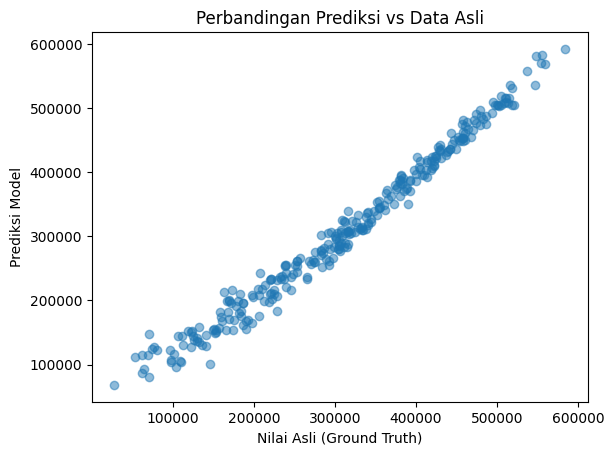

In [26]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Nilai Asli (Ground Truth)")
plt.ylabel("Prediksi Model")
plt.title("Perbandingan Prediksi vs Data Asli")
plt.show()

## TensorFlow

### Library

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

### Input & Output

In [30]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

# Reshape y data for TensorFlow
y_train_tf = tf.reshape(y_train_tf, (-1, 1))
y_test_tf = tf.reshape(y_test_tf, (-1, 1))

# Create TensorFlow dataset
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train_tf)).batch(batch_size).shuffle(buffer_size=1000)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test_tf)).batch(batch_size)

# Define the model
input_dim = X_train.shape[1]

### Model & Training

In [31]:
model_tf = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # No activation for regression output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile the model
model_tf.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='mse'
)

# Train the model
num_epochs = 200
history = model_tf.fit(
    train_dataset,
    epochs=num_epochs,
    verbose=0,  # Set to 1 for more verbose output
    callbacks=[
        tf.keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {logs["loss"]:.4f}')
            if (epoch+1) % 10 == 0 else None
        )
    ]
)


Epoch [10/200], Loss: 105648537600.0000
Epoch [20/200], Loss: 31678103552.0000
Epoch [30/200], Loss: 1886112256.0000
Epoch [40/200], Loss: 1462924032.0000
Epoch [50/200], Loss: 1462373760.0000
Epoch [60/200], Loss: 1425722624.0000
Epoch [70/200], Loss: 1329881728.0000
Epoch [80/200], Loss: 1360610816.0000
Epoch [90/200], Loss: 1233594112.0000
Epoch [100/200], Loss: 1131274112.0000
Epoch [110/200], Loss: 1132896384.0000
Epoch [120/200], Loss: 1214924928.0000
Epoch [130/200], Loss: 1152688256.0000
Epoch [140/200], Loss: 1131341568.0000
Epoch [150/200], Loss: 1124654848.0000
Epoch [160/200], Loss: 1005483264.0000
Epoch [170/200], Loss: 1059898176.0000
Epoch [180/200], Loss: 1009315456.0000
Epoch [190/200], Loss: 890138240.0000
Epoch [200/200], Loss: 986098368.0000


### Eval

In [33]:
# Evaluate the model
test_loss = model_tf.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
tensorflow_preds = model_tf.predict(X_test_tf)
mse_tensorflow = mean_squared_error(y_test, tensorflow_preds)
rmse_tensorflow = np.sqrt(mse_tensorflow)
r2_tensorflow = r2_score(y_test, tensorflow_preds)

print()
print(f'MSE  : {mse_tensorflow:.4f}')
print(f'RMSE : {rmse_tensorflow:.4f}')
print(f'R²   : {r2_tensorflow:.4f}')

Test Loss: 277490976.0000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

MSE  : 277490963.6093
RMSE : 16658.0600
R²   : 0.9828


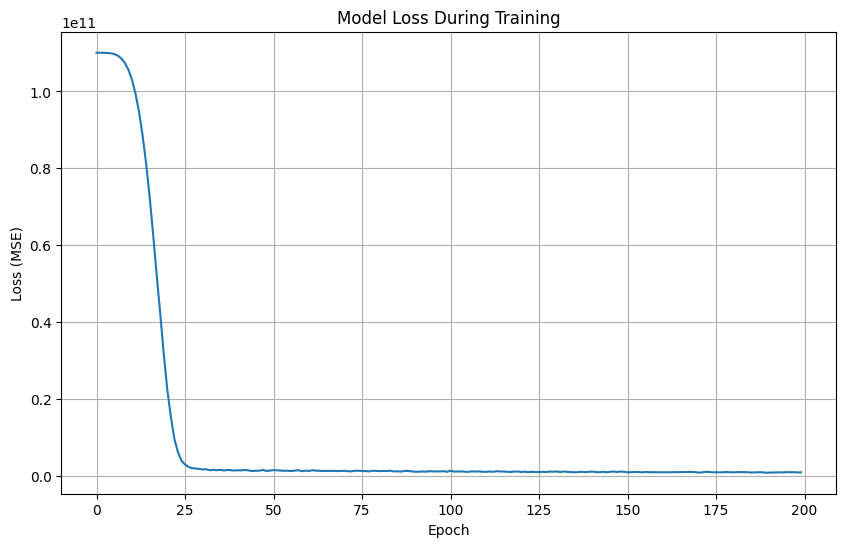

In [34]:
# Optional: Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

## Penjelasan



Persamaan Matematis


1.   Mean Squared Error (MSE)

> MSE mengukur rata rata selisih kuadrat antara nilai prediksi dan nilai aktual. Nilai prediksi adalah harga barang bekas. Semakin kecil nilai MSE, semakin baik prediksi model

2.   Root Mean Squared Error (RMSE)

> RMSE adalah hasil akar dari MSE. RMSE mengukur kesalahan umum dari prediksi model. Semakin kecil nilai RMSE, semakin baik prediksi model

3.   R-Squared (R^2)

> Besaran untuk melihat proporsi varians dari variabel data yang dapat diprediksi. Semakin besar nilai R^2, semakin baik model dalam menangkap variabilitas data



